In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np 
import cv2



Load Data

In [3]:
data = tf.keras.utils.image_dataset_from_directory('path to dataset  folder')

Found 1288 files belonging to 2 classes.


In [4]:
data = data.map(lambda x,y :(x/255,y))


In [5]:
scaled_iterator =data.as_numpy_iterator()

In [6]:
batch = scaled_iterator.next()

In [7]:
len(data)

41

In [8]:
train_size= int(len(data)*0.8)+2
val_size= int(len(data)*0.2)-1


In [9]:
train_size

34

In [10]:
val_size

7

In [11]:
train=data.take(train_size)
validation=data.skip(train_size).take(val_size)

DL MODEL

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.regularizers import l2

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(32,(2,2),1,activation='relu',kernel_regularizer =l2(0.001),input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(2,2),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128,(2,2),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [15]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 128)      0

In [17]:
logdir ='logs'

In [18]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [19]:
hist=model.fit(train,epochs=25,validation_data=validation,callbacks=[tensorboard_callback])

Epoch 1/25
34/34 [==============================] - 100s 3s/step - loss: 0.8169 - accuracy: 0.5873 - val_loss: 0.6025 - val_accuracy: 0.7200
Epoch 2/25
34/34 [==============================] - 23s 630ms/step - loss: 0.6227 - accuracy: 0.6710 - val_loss: 0.5372 - val_accuracy: 0.7550
Epoch 3/25
34/34 [==============================] - 18s 420ms/step - loss: 0.5721 - accuracy: 0.7050 - val_loss: 0.5020 - val_accuracy: 0.8000
Epoch 4/25
34/34 [==============================] - 15s 411ms/step - loss: 0.4881 - accuracy: 0.7610 - val_loss: 0.4167 - val_accuracy: 0.8350
Epoch 5/25
34/34 [==============================] - 14s 372ms/step - loss: 0.4136 - accuracy: 0.8134 - val_loss: 0.4788 - val_accuracy: 0.7700
Epoch 6/25
34/34 [==============================] - 18s 494ms/step - loss: 0.3489 - accuracy: 0.8474 - val_loss: 0.4776 - val_accuracy: 0.7600
Epoch 7/25
34/34 [==============================] - 14s 381ms/step - loss: 0.2973 - accuracy: 0.8768 - val_loss: 0.2790 - val_accuracy: 0.8750
E

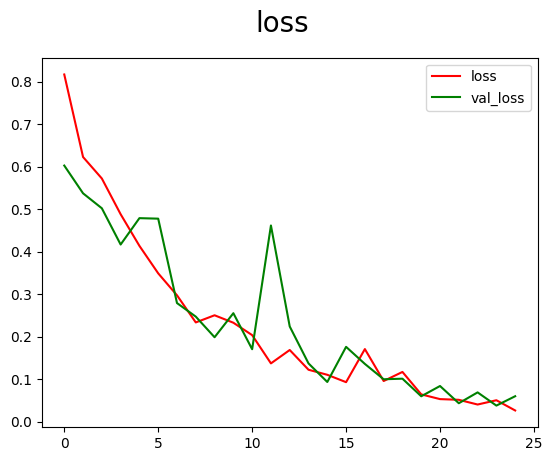

In [20]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='red',label='loss')
plt.plot(hist.history['val_loss'],color='green',label='val_loss')
plt.suptitle("loss",fontsize=20)
plt.legend()
plt.show()

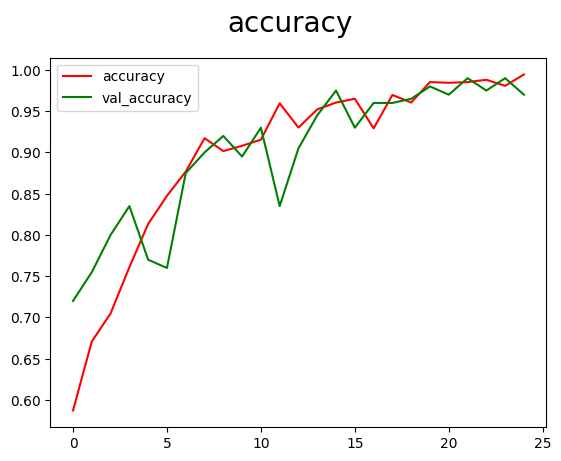

In [21]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='red',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='green',label='val_accuracy')
plt.suptitle("accuracy",fontsize=20)
plt.legend()
plt.show()

In [ ]:
i=0
j=0
n1=75
test_dir='/content/drive/MyDrive/PartitionedDataA/TestA'
for img_class in os.listdir(test_dir):
    for image in os.listdir(os.path.join(test_dir,img_class)):
        image_path = os.path.join(test_dir,img_class,image)
        img=cv2.imread(image_path)
        resize= tf.image.resize(img,(256,256))
        yhat=model.predict(np.expand_dims(resize/255,0))
        if yhat[0][0] < 0.86 :
            if img_class=='3n':
                i+=1
                
        else :
            if img_class=='4n':
                j+=1
                
print("Accuracy for 75 samples of 3n is : " ,i/n1)
print("Accuracy for 75 samples of 4n is : " ,j/n1)
       
    



1/1 [==============================] - 0s 115ms/step
Accuracy for 75 samples of 3n is :  0.88
Accuracy for 75 samples of 4n is :  0.8933333333333333


In [ ]:
model.save('model_AC.h5')